In [1]:
#!pip install psycopg2
#! pip install sqlalchemy 

In [2]:
# Dependencies

import psycopg2
import matplotlib
import pandas as pd
from matplotlib import style

import pandas.io.sql as psql
import pandas as pd
import sqlalchemy
import pandas.io.sql as psql
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func
from config import user, password

# MatPlotLib/NumPy/SciPy
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats

In [3]:
conn = psycopg2.connect(database='sql_challenge', user=user, password=password)
cursor = conn.cursor()
print("Connected!")

Connected!


In [4]:
df = psql.read_sql("SELECT * FROM employee", conn)
df

,emp_no,emp_title,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991
...,...,...,...,...,...,...,...
300019,464231,s0001,8/14/1958,Constantino,Eastman,M,10/28/1988
300020,255832,e0002,5/8/1955,Yuping,Dayang,F,2/26/1995
300021,76671,s0001,6/9/1959,Ortrud,Plessier,M,2/24/1988
300022,264920,s0001,9/22/1959,Percy,Samarati,F,9/8/1994


In [5]:
emp_data = pd.read_sql("SELECT * FROM employee", conn)
sal_data = pd.read_sql("SELECT * FROM salaries", conn)
title_data = pd.read_sql("SELECT * FROM titles", conn)

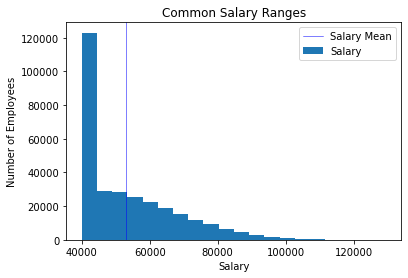

In [10]:
#histogram to visualize the most common salary ranges for employees.
plt.hist(sal_data['salary'], 20, density=False, label="Salary")
plt.axvline(sal_data['salary'].mean(), color='b', linewidth=0.5, label="Salary Mean")
plt.xlabel("Salary")
plt.ylabel("Number of Employees")
plt.legend() 
plt.title("Common Salary Ranges")
plt.savefig("Common Salary Ranges.png")

In [14]:
#bar chart of average salary by title.
# Define the query
query_into_pandas = pd.read_sql("SELECT * FROM salaries INNER JOIN emp_no ON salaries.emp_no = employee.emp_no", conn)

# Store the query
avg_salaries_by_title = query_into_pandas.groupby(["title"]).mean()["salary"]

# Plot the Barchart
title_list = avg_salaries_by_title.index
avg_salary_for_title = avg_salaries_by_title.values

x_axis = np.arange(len(title_list))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, title_list, rotation=90)
plt.title("Average Salary By Title")
plt.xlabel("Title")
plt.ylabel("Average Salary ($)")
plt.grid(axis="y")
chart = plt.bar(x_axis, avg_salary_for_title, color="b", alpha=0.5, align="center")

for i in chart:
    yvalue = i.get_height()
    plt.text(i.get_x(), yvalue + 500, "${:,.2f}K".format(yvalue/1000))
    
plt.show()

DatabaseError: Execution failed on sql 'SELECT * FROM salaries INNER JOIN emp_no ON salaries.emp_no = employee.emp_no': relation "emp_no" does not exist
LINE 1: SELECT * FROM salaries INNER JOIN emp_no ON salaries.emp_no ...
                                          ^


In [ ]:
conn.close()